### 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### 데이터 로드

In [7]:
df = pd.read_csv('ing_4.csv')
data = df.loc[:]

### 컬럼명 확인

In [4]:
#df.columns

### 필요 없는 컬럼 제거

In [62]:
#select_col = ['DATE OCC', 'TIME OCC', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc','Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Desc',
              #'LOCATION', 'LAT', 'LON'
             #]

In [63]:
#data = df.loc[:, select_col]

### 2017년 부터의 데이터만 추출

In [66]:
#data = data.iloc[1437242:]

### M,F,X 성별만 추출

In [68]:
#data = data[data['Vict Sex'].isin(['M', 'F','X'])] 

In [69]:
#data = data.reset_index()

### TIME OCC 컬럼에서 시간 앞에 0으로 채우기

In [8]:
data['TIME OCC'] = [str(i).zfill(4) for i in data['TIME OCC']]

In [10]:
len(data)

510778

In [11]:
#data.to_csv('ing_4.csv')

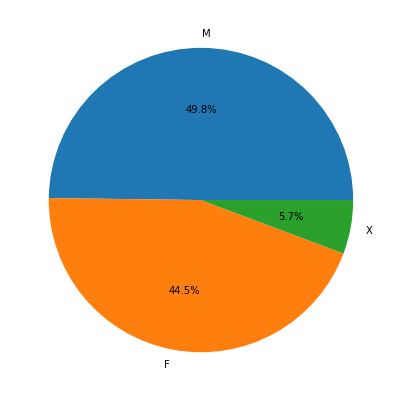

In [12]:
plt.figure(figsize=(7,7))
plt.pie(data['Vict Sex'].value_counts(),labels = data['Vict Sex'].value_counts().index,autopct='%1.1f%%')
plt.show()

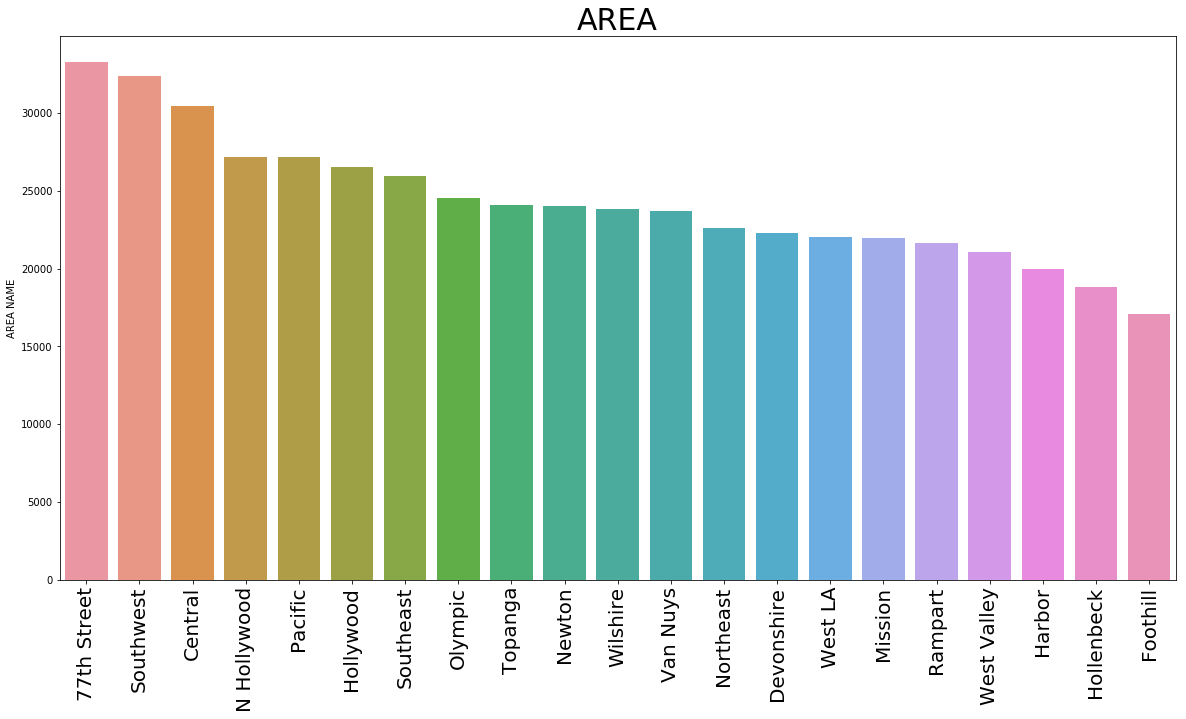

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x=data['AREA NAME'].value_counts().index,y=data['AREA NAME'].value_counts())
plt.xticks(rotation=90,size=20)
plt.title("AREA",size=30)
plt.show()

In [20]:
#lat_lon = ["[{}, {}],".format(data['LON'][i], data['LAT'][i]) for i in range(len(data))]

In [21]:
#with open('lon_lat.txt','w') as f:
    #f.write('\n'.join(lat_lon))

lat = data['LAT']
lon = data['LON']
print(len(lat))
print(len(lon))

In [17]:
map_osm = folium.Map(location = [lat[0], lon[0]], zoom_start = 10)
map_osm

In [19]:
stamen = folium.Map(location = [lat[0], lon[0]], tiles = 'Stamen Toner', zoom_start = 10)
stamen

In [25]:
df.head()

,Unnamed: 0,index,DATE OCC,TIME OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,LOCATION,LAT,LON
0,0,1437242,02/22/2017 12:00:00 AM,1000,Southwest,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36,M,B,STREET,2800 S HARVARD BL,34.0300,-118.3066
1,1,1437243,04/29/2017 12:00:00 AM,2030,Olympic,761,BRANDISH WEAPON,36,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",1200 S MARIPOSA AV,34.0491,-118.2989
2,2,1437245,11/21/2017 12:00:00 AM,1200,Newton,440,THEFT PLAIN - PETTY ($950 & UNDER),24,F,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200 W 27TH ST,34.0248,-118.2715
3,3,1437246,09/22/2017 12:00:00 AM,1800,Olympic,330,BURGLARY FROM VEHICLE,69,M,K,STREET,WASHINGTON BL,34.0400,-118.3057
4,4,1437247,07/06/2017 12:00:00 AM,1130,Southwest,624,BATTERY - SIMPLE ASSAULT,68,F,W,MEDICAL/DENTAL OFFICES,3800 S WESTERN AV,34.0146,-118.3130


In [26]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)